In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [25]:
def gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

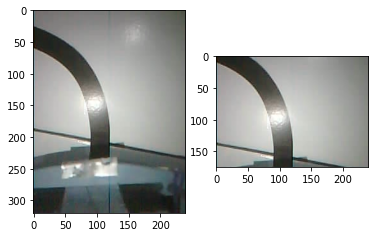

In [153]:
# import image
img1 = cv2.imread('image/thresh-1.png')
img2 = cv2.imread('image/thresh-2.png')
img3 = cv2.imread('image_scan/image-1.jpg')
img4 = cv2.imread('image_scan/image-2.jpg')
img5 = cv2.imread('image_scan/image-3.jpg')

img1_ = img1[100:300, :]
img2_ = img2[100:300, :]
img3_ = img3[50:225, :]
img4_ = img4[50:225, :]
img5_ = img5[50:225, :]

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# display image
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img5)
ax2.imshow(img5_)


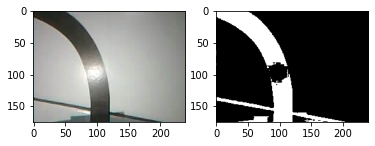

In [74]:
# thresholding
img = img5_
thresh = cv2.adaptiveThreshold(gray(img), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,99,10)
# display image
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img)
ax2.imshow(thresh, cmap='gray')

{'m00': 4634.0, 'm10': 476716.0, 'm01': 388157.8333333333, 'm20': 49467534.666666664, 'm11': 39858758.33333333, 'm02': 46028491.83333333, 'm30': 5175555816.400001, 'm21': 4130852899.5166664, 'm12': 4698983582.216666, 'm03': 6241365774.05, 'mu20': 426070.5630844459, 'mu11': -72413.37045029551, 'mu02': 13515219.589477532, 'mu30': -1007533.8929204941, 'mu21': 2201658.2694234326, 'mu12': -23999343.7355628, 'mu03': 121729095.72040749, 'nu20': 0.019841270191875492, 'nu11': -0.003372148590147782, 'nu02': 0.6293772600389761, 'nu30': -0.0006892385988189537, 'nu21': 0.0015061209070564882, 'nu12': -0.01641758571607579, 'nu03': 0.08327302134386128}


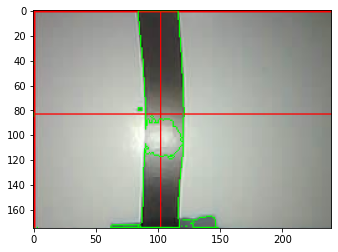

In [41]:
# contour
contours = 0
CX = []
CY = []
contours,hierarchy = cv2.findContours(thresh.copy(), 1, cv2.CHAIN_APPROX_NONE)

if len(contours) > 0:
        c = max(contours, key=cv2.contourArea)
        # find center of contour
        M = cv2.moments(c)
        print(M)
        if M["m00"] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cx1 = int(M['m11']/M['m20'])
            cy1 = int(M['m02']/M['m20'])
            CX.append(cx)
            CY.append(cy)
        else:
            cx = CX[-1]
            cy = CY[-1]

        # draw contour
        cv2.line(img,(cx,0),(cx,720),(255,0,0),1)
        cv2.line(img,(0,cy),(1280,cy),(255,0,0),1)
        
        cv2.line(img,(cx1,0),(cx1,720),(255,0,0),1)
        cv2.line(img,(0,cy1),(1280,cy1),(255,0,0),1)
        cv2.drawContours(img, contours, -1, (0,255,0), 1)

plt.imshow(img)
plt.show()

In [75]:
h, w = img.shape[0], img.shape[1]
lateral_search = 20 # number of pixels to search the line border
start_height = h - 5 # Scan index row 235

print("H :",h)
print("W :", w)

H : 175
W : 240


In [84]:
# line follow
signed_thresh = thresh[start_height].astype(np.int16) # select only one row
diff = np.diff(signed_thresh)   #The derivative of the start_height line
points = np.where(np.logical_or(diff > 200, diff < -200)) #maximums and minimums of derivative
print(signed_thresh.shape)
print(diff.shape)
print(points)

(240,)
(239,)
(array([ 58,  80,  89, 119, 149, 181]),)


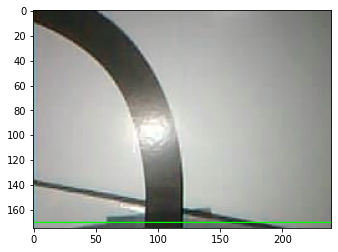

In [78]:
cv2.line(img,(0,start_height),(w,start_height),(0,255,0),1) # draw horizontal line where scanning
plt.imshow(img)

In [89]:
print(points[0][1])

80


In [96]:
middle = (points[0][0] + points[0][1]) / 2
print(middle)

69.0


In [100]:
while True:
    if len(points) > 0 and len(points[0]) > 1:
        middle = (points[0][0] + points[0][1]) / 2
        cv2.circle(img, (points[0][0], start_height), 2, (255,0,0), -1)
        cv2.circle(img, (points[0][1], start_height), 2, (255,0,0), -1)
        cv2.circle(img, (int(middle), start_height), 2, (0,0,255), -1)
    else:
        start_height -= 5
        start_height = start_height % h

KeyboardInterrupt: 

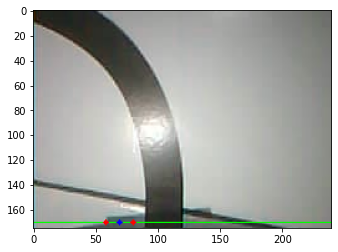

In [101]:
plt.imshow(img)

In [103]:
# line follow
import numpy as np
import cv2
import time

In [104]:
def SlicePart(image, slices, i):
	height, width  = image.shape[:2]
	sl = int(height/slices);
	part = sl*(i-1)
	crop_img = image[part:part+sl, 0:width]

	return crop_img

In [105]:
imgList=[] #Array to store the sliced images
pointsList=[] # Array of points over the frame

In [106]:
def centers(moments, x):
    if moments["m00"] == 0:
        return 0
    else:
        if x == 0:
            return int(moments["m10"]/moments["m00"])
        else:
            return int(moments["m01"]/moments["m00"])

5


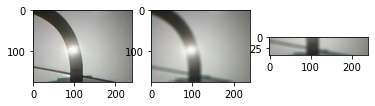

In [121]:
# blur image
img = img5_
blur = cv2.blur(img,(10,10)) #Blur the image to smooth the contour
# slice image
imgList=[]
for i in range(9):
    imgList.append(SlicePart(blur, 8, i)) #Slice the frame in 4 parts and add them to the array

print(len(imgList))
# display image
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.imshow(img)
ax2.imshow(blur)
ax3.imshow(imgList[4])

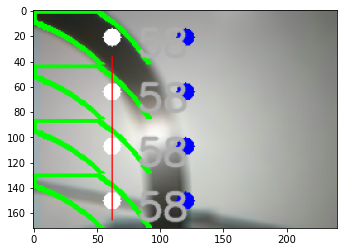

In [122]:
direction = 0
for l in range(1,5): # For every slice in each frame
    im = imgList[l]
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) #Convert to Gray Scale
    thresh = cv2.adaptiveThreshold(gray(img), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,99,10)
    contours, hierarchy = cv2.findContours(thresh,1,cv2.CHAIN_APPROX_SIMPLE) #Get contour of each slice

    height, width  = im.shape[:2]
    center = None

    middleX = int(width/2) #Get X coordenate of the middle point
    middleY = int(height/2) #Get Y coordenate of the middle point
    if contours: # If has found a contour
        c = max(contours, key=cv2.contourArea) #Get the largest contour

        #----------- Contour Center---------------
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)
        cX = centers(M,0)
        cY = centers(M,1)
        #/////////// Contour Center///////////////

        direction += (middleX-cX) #Calculate the direction to turn

        pointsList.append([cX, cY+(int(height)*(l-1))]) #Add the center of point to the array

        cv2.drawContours(im,contours,-1,(0,255,0),3) #Draw Contour GREEN
        cv2.circle(im, (cX, middleY), 7, (255,255,255), -1) #Draw dX circle WHITE
        cv2.circle(im, (middleX, middleY), 7, (0,0,255), -1) #Draw middle circle RED

        #Calculate dX = middleX-cX

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(im,str(middleX-cX),(cX+20, cY), font, 1,(175,175,175),2,cv2.LINE_AA) # Text that indicates dX 
vis = np.concatenate((np.concatenate((imgList[1], imgList[2]), axis=0), np.concatenate((imgList[3], imgList[4]), axis=0)), axis=0) #Repack all the slices to a
cv2.polylines(vis, np.int32([pointsList]), 1, (255,0,0)) #Draw line over the points of each slice

plt.imshow(vis)


In [154]:
def ImProcess(frame):
    direction = 0
    # frame = cv2.blur(frame,(10,10)) #Blur the image to smooth the contour
    for i in range(9):
        imgList.append(SlicePart(frame, 8, i)) #Slice the frame in 4 parts and add them to the array
    for l in range(1,9): # For every slice in each frame
        im = imgList[l]
        imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) #Convert to Gray Scale
        ret, thresh = cv2.threshold(imgray,100,255,cv2.THRESH_BINARY_INV) #Get Threshold

        contours, hierarchy = cv2.findContours(thresh, 1,cv2.CHAIN_APPROX_SIMPLE) #Get contour of each slice

        height, width  = im.shape[:2]
        center = None

        middleX = int(width/2) #Get X coordenate of the middle point
        middleY = int(height/2) #Get Y coordenate of the middle point

        if contours: # If has found a contour
            c = max(contours, key=cv2.contourArea) #Get the largest contour

            #----------- Contour Center---------------
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            cX = centers(M,0)
            cY = centers(M,1)
            #/////////// Contour Center///////////////

            direction += (middleX-cX) #Calculate the direction to turn

            pointsList.append([cX, cY+(int(height)*(l-1))]) #Add the center of point to the array

            cv2.drawContours(im,contours,-1,(0,255,0),1) #Draw Contour GREEN
            cv2.circle(im, (cX, middleY), 3, (255,255,255), -1) #Draw dX circle WHITE
            cv2.circle(im, (middleX, middleY), 3, (0,0,255), -1) #Draw middle circle RED

            #Calculate dX = middleX-cX

            # font = cv2.FONT_HERSHEY_SIMPLEX
            # cv2.putText(im,str(middleX-cX),(cX+20, cY), font, 1,(175,175,175),2,cv2.LINE_AA) # Text that indicates dX

    vis = np.concatenate((
        np.concatenate((imgList[1], imgList[2]), axis=0), 
        np.concatenate((imgList[3], imgList[4]), axis=0),
        np.concatenate((imgList[5], imgList[6]), axis=0),
        np.concatenate((imgList[7], imgList[8]), axis=0),
        ), axis=0) #Repack all the slices to a complete image

    cv2.polylines(vis, np.int32([pointsList]), 1, (255,0,0)) #Draw line over the points of each slice

    #Flush the data
    del imgList[:] 
    del pointsList[:]

    return vis, direction 

Direction: 260


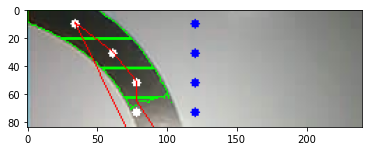

In [155]:
img = img5_
fm, d = ImProcess(img)
plt.imshow(fm)
print("Direction:", d)